##Sentiment Analysis and Data Visualization

Once the dataset is ready,sentiment intensity is measured.If the result is below 0 then its a negative review ,elseif the result is above 0 then it is a positive review,else it is a neutral review.

Later Data visualization is done using Matplotlib.

For better understanding, Topic Modelling,Sentiment Analysis and wordclouds are plotted and shown as a visualization.



In [ ]:

from nltk.sentiment import vader
import nltk
import matplotlib.pyplot as plt
import requests
from collections import Counter
import pandas as pd

nltk.download('vader_lexicon')
sentiment_analyzer = vader.SentimentIntensityAnalyzer()

# a new column named 'SENTIMENT'
df['SENTIMENT'] = df['REVIEW'].apply(
    lambda review: sentiment_analyzer.polarity_scores(review)['compound']
    )
df

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,REVIEW,SENTIMENT
0,"A last minute business trip to HND, a route I...",0.7968
1,Overall I would say disappointing. Due to B...,-0.8502
2,Not Verified | LHR to Delhi in Business. Exce...,0.9794
3,Not Verified | Efficient and Smooth flight fr...,0.9055
4,Was told we can not take hand luggage onto th...,-0.9807
...,...,...
995,Bridgetown to London Gatwick. Paid for a Bus...,0.7750
996,St Lucia to Gatwick on which my wife and I w...,0.6542
997,Chicago to London. Cancelled flights just a ...,0.1036
998,London to Bangalore. This was the worst expe...,-0.8893


from matplotlib import pyplot as plt
df['SENTIMENT'].plot(kind='hist', bins=20, title='SENTIMENT')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['SENTIMENT'].plot(kind='line', figsize=(8, 4), title='SENTIMENT')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
df['SENTIMENT_TYPE'] = df['SENTIMENT'].apply(
    lambda score: 'positive' if score > 0 else ('negative' if score < 0 else 'neutral')
    )
df

,REVIEW,SENTIMENT,SENTIMENT_TYPE
0,"A last minute business trip to HND, a route I...",0.7968,positive
1,Overall I would say disappointing. Due to B...,-0.8502,negative
2,Not Verified | LHR to Delhi in Business. Exce...,0.9794,positive
3,Not Verified | Efficient and Smooth flight fr...,0.9055,positive
4,Was told we can not take hand luggage onto th...,-0.9807,negative
...,...,...,...
995,Bridgetown to London Gatwick. Paid for a Bus...,0.7750,positive
996,St Lucia to Gatwick on which my wife and I w...,0.6542,positive
997,Chicago to London. Cancelled flights just a ...,0.1036,positive
998,London to Bangalore. This was the worst expe...,-0.8893,negative


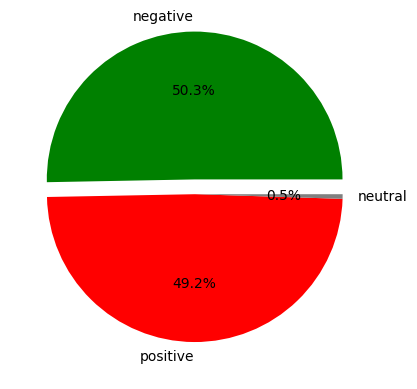

In [ ]:
sentiment_type_percentages = df['SENTIMENT_TYPE'].value_counts(normalize=True) * 100

# create the pie chart
fig, ax = plt.subplots()
ax.pie(
    sentiment_type_percentages,
    labels=sentiment_type_percentages.index,
    colors=['green', 'red', 'grey'],
    explode=[0.1, 0, 0],
    autopct='%1.1f%%'
    )

plt.show()

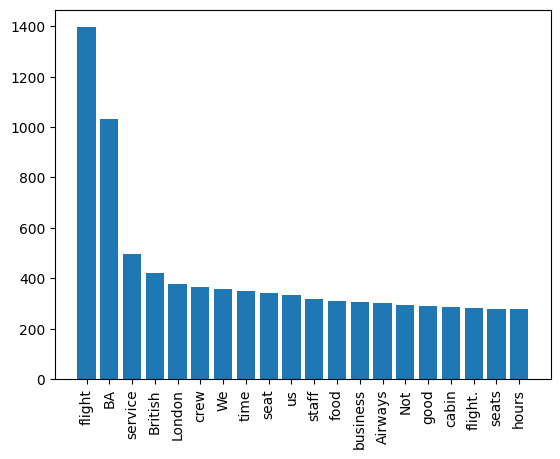

In [ ]:
reviews = df['REVIEW']

# Convert the reviews to a list of words
words = []
for review in reviews:
    words.extend(review.split())

# Filter out the stubborn stop words that don't want to disappear
stopwords = nltk.corpus.stopwords.words('english')
key_words = [word for word in words if word not in stopwords and word not in ['I', 'The','would','one','get','-']]

# Get the top 20 most used key words
word_counts = Counter(key_words)
top_20_words = word_counts.most_common(20)

# Filter out the stop words
filtered_words = [
    (word, count) for word, count in top_20_words if word not in stopwords and word not in ['I', 'The','would','one','get','-']
    ]

# Get the labels and values for the histogram
labels, values = zip(*top_20_words)

# Create the histogram
plt.bar(labels, values)

# Set the x-axis labels to be vertical
plt.xticks(rotation=90)

#Display the plot
plt.show()

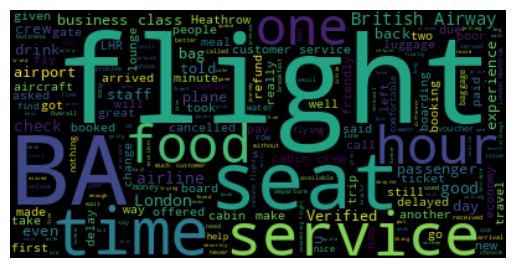

In [ ]:
# Import the necessary libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Create the wordcloud
wordcloud = WordCloud(random_state=42).generate(' '.join(df['REVIEW']))

# Show the word cloud
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis("off")
plt.show()